In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_weat = pd.read_parquet("../../data/weather_df.parquet")

In [3]:
df_weat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   place   5000 non-null   object        
 1   hot     5000 non-null   int64         
 2   rain    5000 non-null   int64         
 3   snow    5000 non-null   int64         
 4   date    5000 non-null   datetime64[us]
dtypes: datetime64[us](1), int64(3), object(1)
memory usage: 195.4+ KB


In [4]:
df_weat

,place,hot,rain,snow,date
0,Фалькония,0,0,0,2216-01-02
1,Анор Лондо,1,0,0,2216-01-02
2,Врата Балдура,0,0,1,2216-01-02
3,Нокрон,0,0,0,2216-01-02
4,Кеджистан,0,0,1,2216-01-02
...,...,...,...,...,...
4995,Фалькония,0,0,0,2218-09-27
4996,Анор Лондо,0,0,1,2218-09-27
4997,Врата Балдура,1,0,0,2218-09-27
4998,Нокрон,0,0,0,2218-09-27


In [5]:
cat_col = ["place", "hot", "rain", "snow"]
time_col = ["date"]

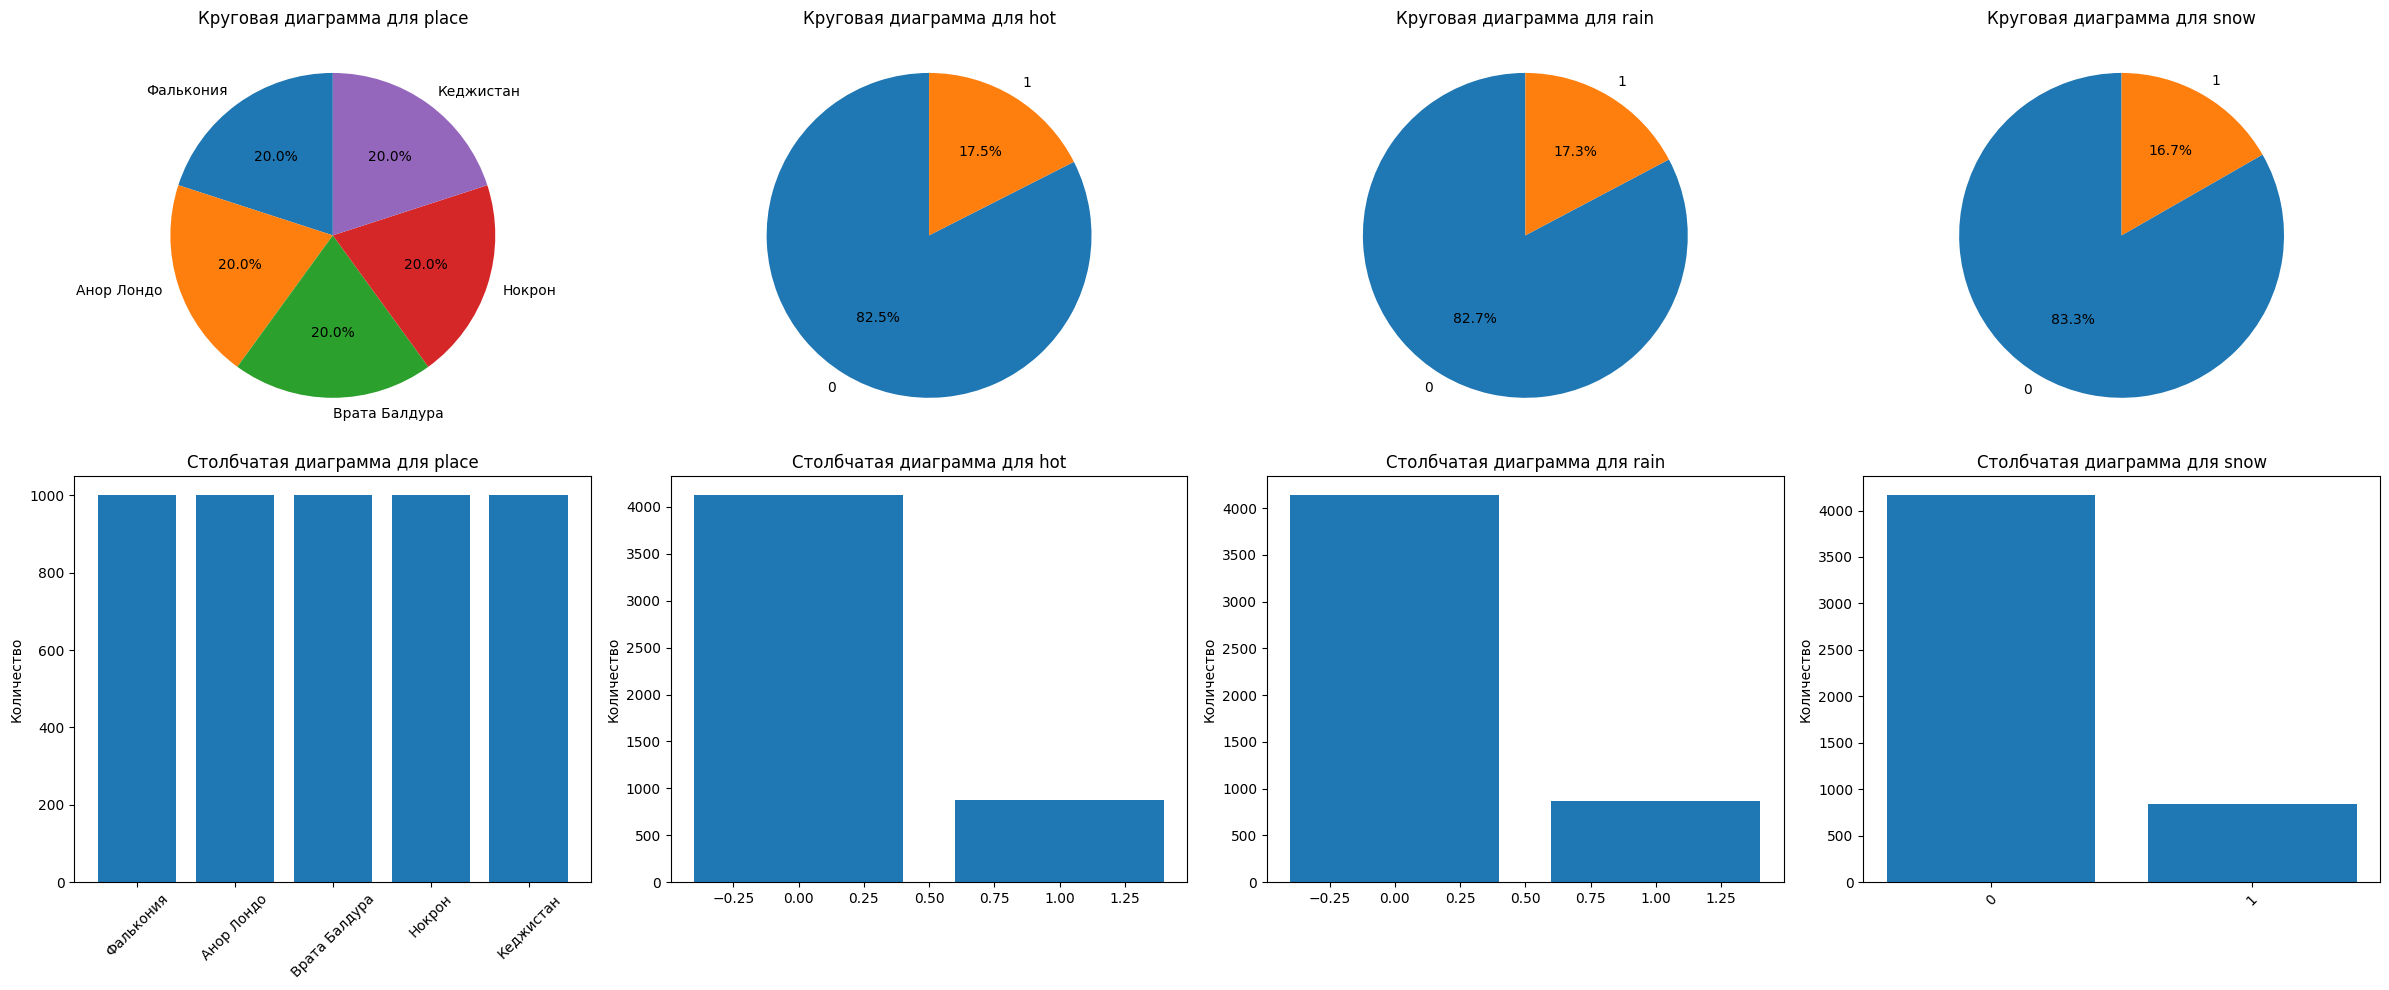

In [6]:
fig, axs = plt.subplots(2, len(cat_col), figsize=(6 * len(cat_col), 10))

for idx, col in enumerate(cat_col):
    value_counts = df_weat[col].value_counts()

    axs[0, idx].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axs[0, idx].set_title(f'Круговая диаграмма для {col}')

    axs[1, idx].bar(value_counts.index, value_counts.values)
    axs[1, idx].set_title(f'Столбчатая диаграмма для {col}')
    axs[1, idx].set_ylabel('Количество')

    if idx == 0 or idx == len(cat_col) - 1:
        axs[1, idx].set_xticks(range(len(value_counts.index)))
        axs[1, idx].set_xticklabels(value_counts.index, rotation=45)

plt.tight_layout()
plt.show()

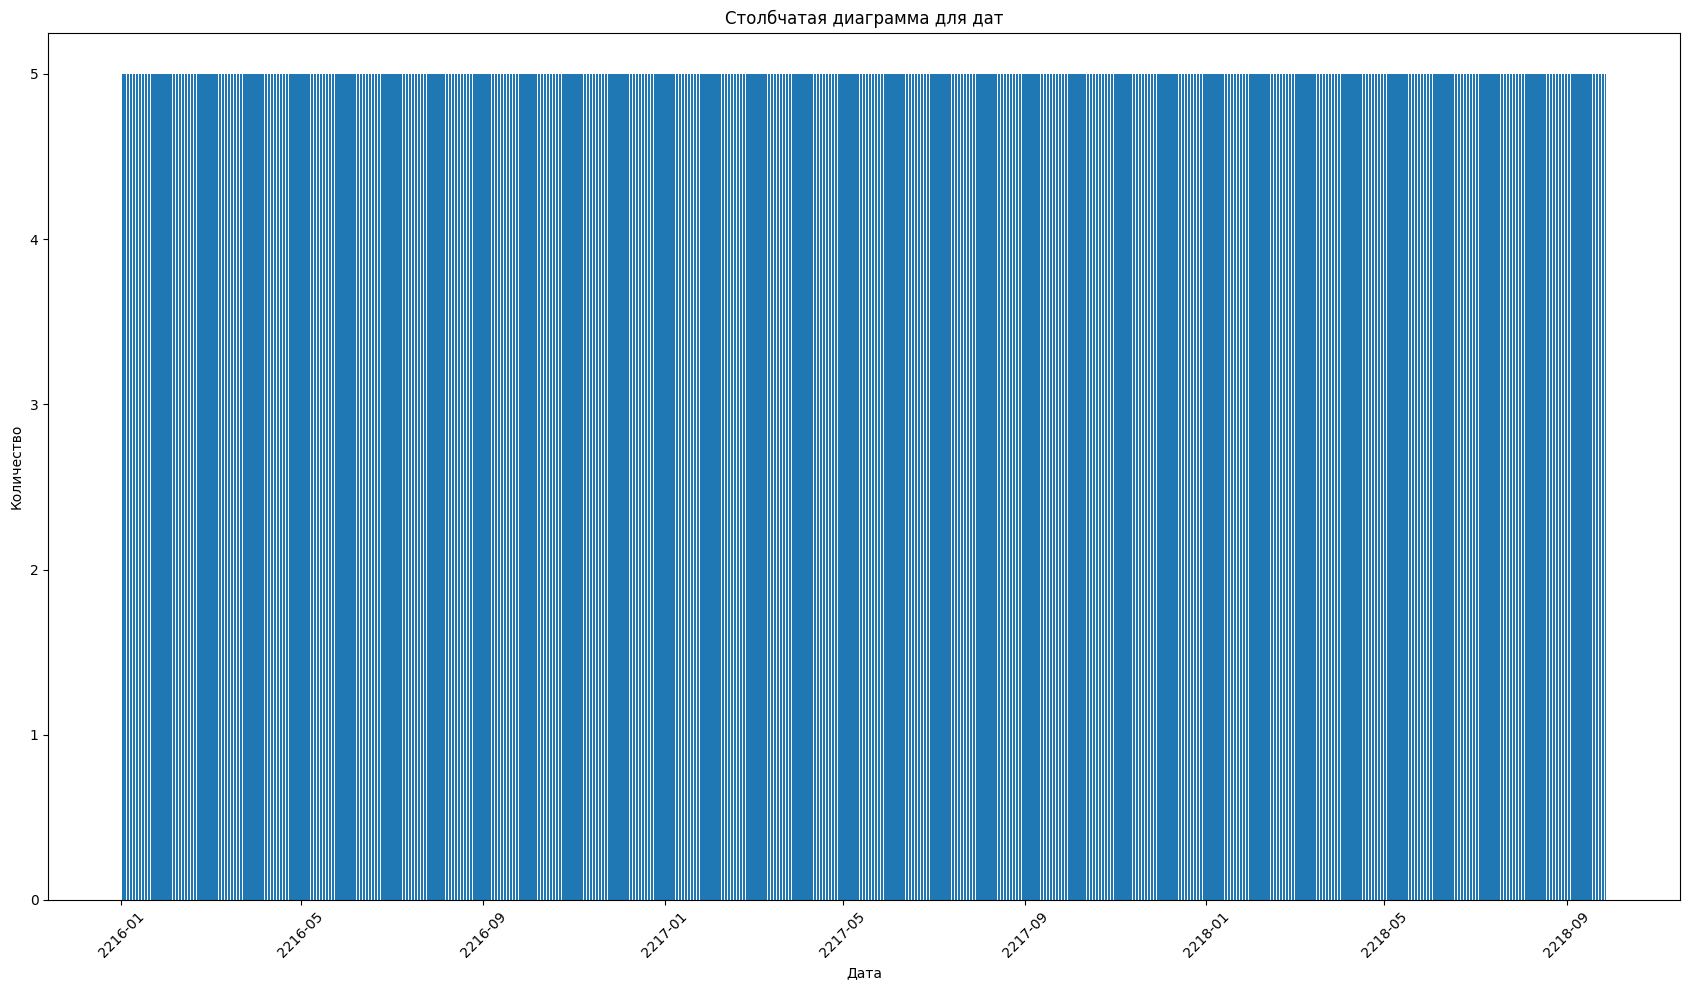

In [7]:
plt.figure(figsize=(17, 10))
value_counts = df_weat['date'].dt.normalize().value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.title(f'Столбчатая диаграмма для дат')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()